# Mise en oeuvre de l'algorithme EM

## Calcul de la valeur de la densité de probabilité d'un mélange de gaussienne en un point
### Les paramétres de la fonction gm_pdf
<ul>
<li>x : le point où l'on calcule la valeur de la densitè</li>
<li>mu : le vecteur des moyennes des gaussiennes</li>
<li>sigma : le vecteur des écart-types des gaussiennes</li>
<li>p : le vecteur des probabilitès de la loi multinomiale associèe</li>
</ul>

In [1]:
import numpy as np
from scipy.stats import norm
from scipy.stats import uniform
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def gm_pdf(x, mu, sigma, p):
    #Initialisation de la variable de sortie
    resultat = 0.0
    #Contrôle de la cohérence des paramètres d'entrée
    #Le vecteur de moyenne doit avoir la même longueur que le vecteur p
    if len(mu) != len(p):
        print('Erreur de dimension sur la moyenne')
    # Le vecteur des écart-types doit avoir la même longueur que le vecteur p
    elif len(sigma) != len(p):
            print('Erreur de dimension sur les écarts-types')
    else:
    # Calcul de la valeur de la densité
        for i in range(0, len(p)):
            resultat = resultat + p[i] * norm.pdf(x, mu[i], sigma[i])
    return resultat

## Génération de nombre aléatoire suivant un mélange de gaussienne
Dans un mélange de gaussienne chaque densité de probabilité correspondant à une loi normale est pondérée par un coefficient plus petit que un.
La somme de tous ces coefficients est égale à un. Une variable aléatoire qui suit une loi normale suit donc une des lois normales du mélange avec une probabilité égale au coefficient de pondération de cette même loi normale. Pour générer un échantillon suivant une loi normale, il faut donc procéder en deux étapes :
<ol>
<li>Tirer aléatoirement un nombre entre 1 et N (le nombre de gaussiennes du mélange) suivant une loi mumltinomiale définie par les coefficients du mélange.</li>
<li>Une fois ce nombre obtenu, on génère le nombre suivant la loi normale associée.</li>
</ol>

### Les paramètres de la fonction gm_rnd

<ul>
<li>mu : le vecteur des moyennes des gaussiennes</li>
<li>sigma : le vecteur des écart-types des gaussiennes</li>
<li>p : le vecteur des probabilités de la loi multinomiale associée</li>
</ul>

In [3]:
def gm_rnd(mu, sigma, p):
    # Initialisation de la variable de sortie
    resultat = 0.0
    #Contrôle de la cohérence des paramètres d'entrée
    #Le vecteur de moyenne doit avoir la même longueur que le vecteur p
    if len(mu) != len(p):
        print('Erreur de dimension sur la moyenne')
    # Le vecteur des écart-types doit avoir la même longueur que le vecteur p
    elif len(sigma) != len(p):
            print('Erreur de dimension sur sur les écarts-types')
    else:
    #Génération de l'échantillon
    # On échantillonne suivant une loi uniforme sur [0,1]
        u = uniform.rvs(loc = 0.0, scale = 1.0, size = 1)
    # % Chaque test suivant permet de définir un intervalle sur lequel la
    # probabilité d'appartenance de la variable uniforme est égale à l'une des
    # probabilités définie dans le vecteur p. Lorsque u appartient à l'un de
    # ces intervalles, c'est équivalent à avoir générer une variable aléatoire
    # suivant l'un des éléments de p. Par exemple, pour le premier test
    # ci-dessous, la probabilité que u appartienne à l'intervalle [0,p[0][ est
    # égale à p[0] puisque u suit une loi uniforme. Donc si u appartient à
    # [0,p[0][ cela est équivalent à avoir tirer suivant l'événement de probabilité p[0].
        if u < p[0]: # On test si on a généré un événement de probabilité p[0]
            resultat = sigma[0] * norm.rvs(loc = 0, scale = 1, size = 1) + mu[0]
            # Pour générer suivant une loi normale quelconque, il suffit de multiplier
            # une variable normale centrée réduite (moyenne nulle et écart-type égal à 1)
            # par l'écart-type désité et d'additionner la moyenne désirée au produit précédent.
        for i in range(1, len(p)):
            if (u > np.sum(p[0:i])) and (u <= np.sum(p[0:i+1])): # On test si on a généré
                # un événement de probabilité p[i]
                resultat = sigma[i] * norm.rvs(loc = 0.0, scale = 1.0, size = 1) + mu[i]
                # Pour générer suivant une loi normale quelconque, il suffit de multiplier
                # une variable normale centrée réduite (moyenne nulle et écart-type égal à 1)
                # par l'écart-type désité et d'additionner la moyenne désirée au produit précédent.
    return resultat

### Les paramètres de la densité de mélange de gaussienne

In [4]:
p = np.array([0.2, 0.5, 0.3])
mu = np.array([-5.0, 0.0, 6.0])
sigma = np.array([1.0, 0.5, 1.0])

### Calcul de la densité de probabilité du mélange de gaussienne

In [5]:
x = np.arange(-20,20, 0.001)
pointPdf = gm_pdf(x, mu, sigma, p)

### Tracé de la densité de probabilité du mélange de gaussienne

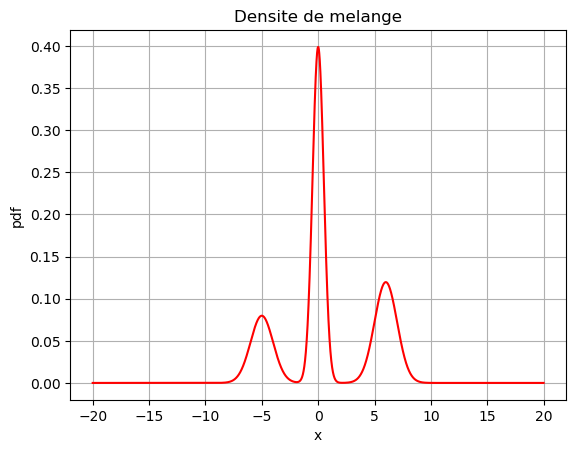

In [6]:
plt.plot(x, pointPdf, 'r-')
plt.title('Densite de melange')
plt.xlabel('x')
plt.ylabel('pdf')
plt.grid()
plt.show()

### Génération d'échantillons suivant  densité de probabilité du mélange de gaussienne

In [7]:
nbEchantillon = 1000
donnees = np.array(nbEchantillon*[0],dtype = float)
for i in range(0, nbEchantillon, 1):
    donnees[i] = gm_rnd(mu, sigma, p)

### Tracé des échantillons 

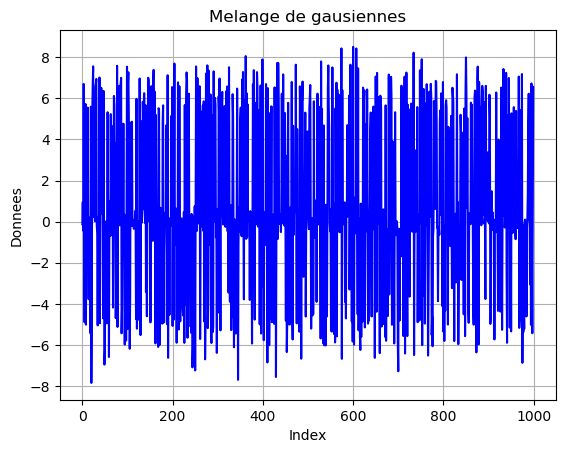

In [8]:
plt.plot(donnees, 'b')
plt.title('Melange de gausiennes')
plt.xlabel('Index')
plt.ylabel('Donnees')
plt.grid()
plt.show()

### Tracé des échantillons

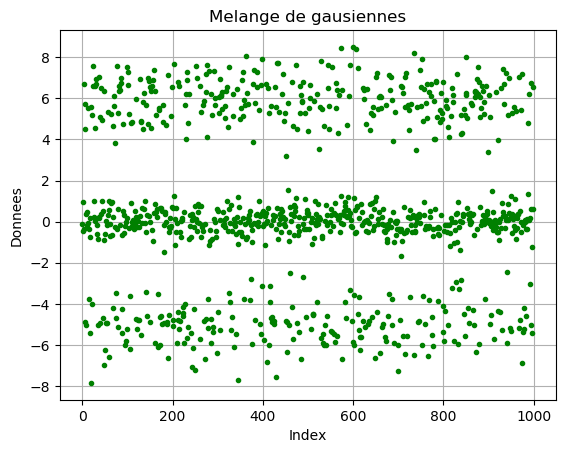

In [9]:
plt.plot(donnees, 'g.')
plt.title('Melange de gausiennes')
plt.xlabel('Index')
plt.ylabel('Donnees')
plt.grid()
plt.show()

### Tracé de l'histogramme des échantillons

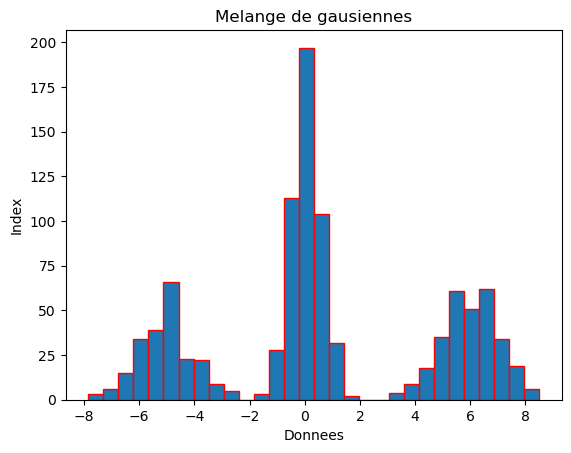

In [10]:
plt.hist(donnees, bins = 30, density = False, edgecolor = "red")
plt.title('Melange de gausiennes')
plt.xlabel('Donnees')
plt.ylabel('Index')
plt.show()

### Tracé de l'histogramme des échantillons

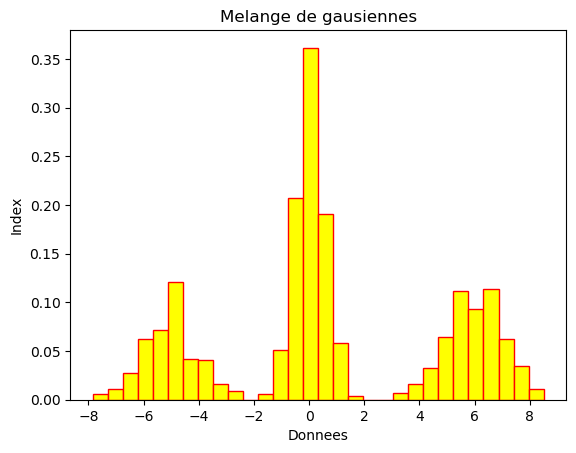

In [11]:
plt.hist(donnees, bins = 30, density = True, color = 'yellow', edgecolor = "red")
plt.title('Melange de gausiennes')
plt.xlabel('Donnees')
plt.ylabel('Index')
plt.show()

### L'algorithme EM

In [12]:
nbMaxIterations = 40
mu_em = np.array([-0.0156, -4.9148, 5.9692])
sigma_em = np.array([1.3395, 1.3395, 1.3395])
alpha_em = np.array([0.4800, 0.2200, 0.3000])

print(norm.pdf(x = donnees[0], loc = mu_em[0], scale = sigma_em[0]))
print(donnees[0])
print(mu_em[0])
print(sigma_em[0])


nbIteration = 1 #Initialisation de la variable d'arrêt
nbComposante = len(alpha_em) #Nombre de composantes du mélange
nbDonnees = len(donnees)  #Nombre de données
p = np.zeros(shape=(nbComposante, nbDonnees))
#Déclaration et initialisation de la matrice qui va contenir les probabilités
#p(k|x,theta_courant)
                       
alpha_em_new = alpha_em
sigma_em_carre_new = sigma_em
mu_em_new = mu_em
donneesP = np.zeros(shape=(nbEchantillon))

while nbIteration < nbMaxIterations:
    for n in range(0, nbDonnees, 1):
        for k in range(0, nbComposante, 1):
            p[k, n] = alpha_em[k] * norm.pdf(x = donnees[n], loc = mu_em[k], scale = sigma_em[k])
        p[:, n] = p[:, n] / np.sum(p[:, n])
    for k in range(0, nbComposante, 1):
        alpha_em_new[k] = np.sum(p[k,:]) / nbDonnees
        for n in range(0, nbDonnees, 1):
            donneesP[n] = donnees[n] * p[k, n]
        mu_em_new[k]  = np.sum(donneesP) / np.sum(p[k, :])
        for n in range(nbDonnees):
            donneesP[n] = ((donnees[n] - mu_em_new[k]) ** 2) * p[k, n]
        sigma_em_carre_new[k] = np.sum(donneesP) / np.sum(p[k, :])
    mu_em = mu_em_new
    sigma_em = np.sqrt(sigma_em_carre_new)
    alpha_em = alpha_em_new
    nbIteration = nbIteration + 1

0.29683070716262167
-0.12537967096433256
-0.0156
1.3395


In [13]:
print('Les paramètres estimés sont : ')
print('Moyennes des composantes du mélange', mu_em)
print('Ecrat type des composantes du mélange', sigma_em)
print('Probabilités des composantes du mélange', alpha_em)

Les paramètres estimés sont : 
Moyennes des composantes du mélange [ 0.04535599 -5.03422838  6.00730554]
Ecrat type des composantes du mélange [0.52431424 1.00109994 1.00965561]
Probabilités des composantes du mélange [0.4787571  0.22224047 0.29900243]


In [14]:
print('La somme des probabilités des composantes du mélange vaut : ', np.sum(alpha_em))

La somme des probabilités des composantes du mélange vaut :  1.0


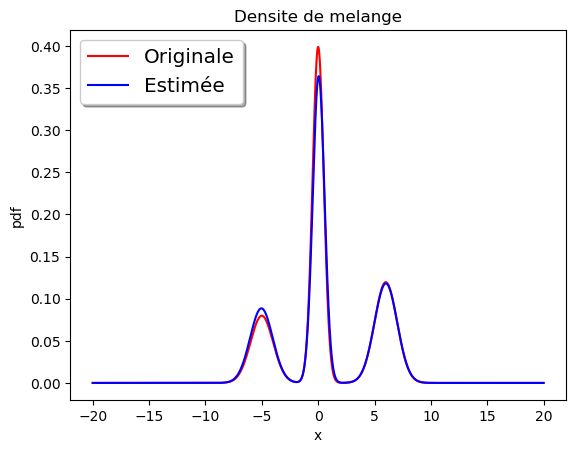

In [15]:
plt.plot(x, pointPdf, 'r-', label = 'Originale')
plt.title('Densite de melange')
plt.xlabel('x')
plt.ylabel('pdf')
pointPdfEstime = gm_pdf(x, mu_em, sigma_em, alpha_em)
plt.plot(x, pointPdfEstime, 'b-', label = 'Estimée')
plt.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.show()

### Jeu de données galaxy 

In [16]:
df = pd.read_excel('2223G3-SDIA-Galaxy.xlsx', header=None)

(array([6.80016359e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.94290388e-05, 0.00000000e+00, 5.82871165e-05,
        2.23433947e-04, 8.74306748e-05, 1.36003272e-04, 9.71451942e-05,
        4.85725971e-05, 9.71451942e-06, 1.94290388e-05, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.94290388e-05, 9.71451942e-06]),
 array([ 9172.  , 10427.35, 11682.7 , 12938.05, 14193.4 , 15448.75,
        16704.1 , 17959.45, 19214.8 , 20470.15, 21725.5 , 22980.85,
        24236.2 , 25491.55, 26746.9 , 28002.25, 29257.6 , 30512.95,
        31768.3 , 33023.65, 34279.  ]),
 <a list of 20 Patch objects>)

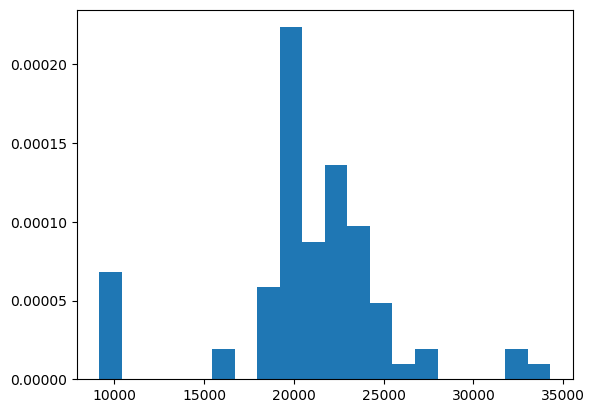

In [17]:
donnees = np.array(df)[:,0]
plt.hist(donnees, density=True, bins=20)

### Modélisation par un mélange de 3 gaussiennes

In [18]:
nbMaxIterations = 40
mu_em = np.array([10000, 19000, 22000, 33000])
sigma_em = np.array([1000, 5000, 1500])
alpha_em = np.array([0.2, 0.7, 0.1])


nbIteration = 1 #Initialisation de la variable d'arrêt
nbComposante = len(alpha_em) #Nombre de composantes du mélange
nbDonnees = len(donnees)  #Nombre de données
p = np.zeros(shape=(nbComposante, nbDonnees))
#Déclaration et initialisation de la matrice qui va contenir les probabilités
#p(k|x,theta_courant)
                       
alpha_em_new = alpha_em
sigma_em_carre_new = sigma_em
mu_em_new = mu_em
donneesP = np.zeros(shape=(nbDonnees))

while nbIteration < nbMaxIterations:
    for n in range(0, nbDonnees, 1):
        for k in range(0, nbComposante, 1):
            p[k, n] = alpha_em[k] * norm.pdf(x = donnees[n], loc = mu_em[k], scale = sigma_em[k])
        p[:, n] = p[:, n] / np.sum(p[:, n])
    for k in range(0, nbComposante, 1):
        alpha_em_new[k] = np.sum(p[k,:]) / nbDonnees
        for n in range(0, nbDonnees, 1):
            donneesP[n] = donnees[n] * p[k, n]
        mu_em_new[k]  = np.sum(donneesP) / np.sum(p[k, :])
        for n in range(nbDonnees):
            donneesP[n] = ((donnees[n] - mu_em_new[k]) ** 2) * p[k, n]
        sigma_em_carre_new[k] = np.sum(donneesP) / np.sum(p[k, :])
    mu_em = mu_em_new
    sigma_em = np.sqrt(sigma_em_carre_new)
    alpha_em = alpha_em_new
    nbIteration = nbIteration + 1

In [19]:
print('Les paramètres estimés sont : ')
print('Moyennes des composantes du mélange', mu_em)
print('Ecart type des composantes du mélange', sigma_em)
print('Probabilités des composantes du mélange', alpha_em)

Les paramètres estimés sont : 
Moyennes des composantes du mélange [ 9710 28764 21258 33000]
Ecart type des composantes du mélange [ 422.49970414 4655.3193231  2068.01233072]
Probabilités des composantes du mélange [0.08536005 0.07438916 0.84025079]


In [20]:
def gaussienne(mu, sigma, x):
    return (1/(np.sqrt(2*np.pi*sigma**2)))*np.exp(-(x-mu)**2/(2*sigma**2))

In [21]:
def estimation_f(x, n=nbComposante) :
    res = 0
    for i in range (n):
        res += alpha_em[i]*gaussienne(mu_em[i], sigma_em[i], x)
    return res

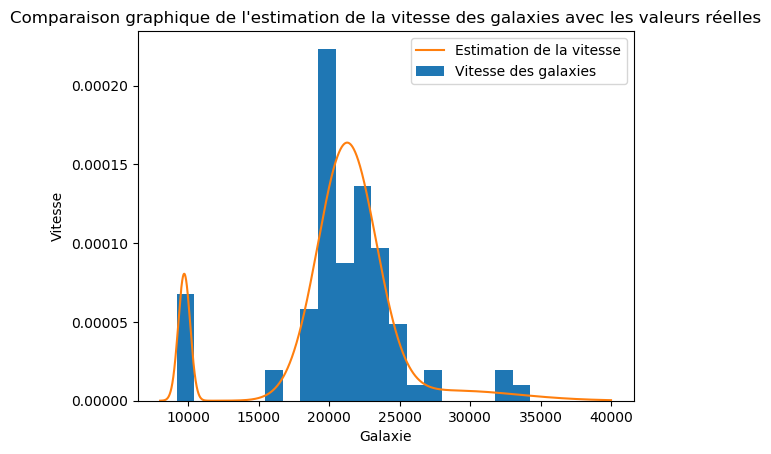

In [23]:
x = np.arange(8000, 40000)
plt.hist(donnees, density=True, bins=20, label='Vitesse des galaxies')
plt.plot(x, estimation_f(x), label='Estimation de la vitesse')
plt.title('Comparaison graphique de l\'estimation de la vitesse des galaxies avec les valeurs réelles')
plt.xlabel('Galaxie')
plt.ylabel('Vitesse')
plt.legend()

### Modélisation par un mélange de 4 Gaussiennes

(array([7.28588956e-05, 2.91435583e-05, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.91435583e-05, 0.00000000e+00, 0.00000000e+00, 8.74306748e-05,
        2.33148466e-04, 1.74861350e-04, 5.82871165e-05, 1.45717791e-04,
        1.02002454e-04, 1.02002454e-04, 7.28588956e-05, 1.45717791e-05,
        0.00000000e+00, 2.91435583e-05, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.45717791e-05,
        1.45717791e-05, 1.45717791e-05]),
 array([ 9172. , 10008.9, 10845.8, 11682.7, 12519.6, 13356.5, 14193.4,
        15030.3, 15867.2, 16704.1, 17541. , 18377.9, 19214.8, 20051.7,
        20888.6, 21725.5, 22562.4, 23399.3, 24236.2, 25073.1, 25910. ,
        26746.9, 27583.8, 28420.7, 29257.6, 30094.5, 30931.4, 31768.3,
        32605.2, 33442.1, 34279. ]),
 <a list of 30 Patch objects>)

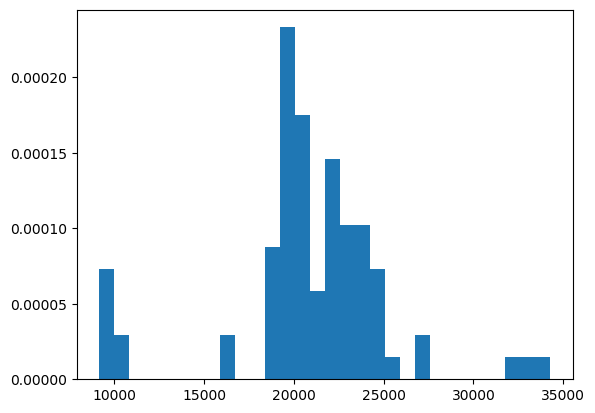

In [24]:
plt.hist(donnees, density=True, bins=30, label='Vitesse des galaxies')

In [25]:
nbMaxIterations = 40
mu_em = np.array([10000, 19000, 22000, 33000])
sigma_em = np.array([1000, 2000, 3000, 1500])
alpha_em = np.array([0.15, 0.45, 0.3, 0.1])

nbIteration = 1 #Initialisation de la variable d'arrêt
nbComposante = len(alpha_em) #Nombre de composantes du mélange
nbDonnees = len(donnees)  #Nombre de données
p = np.zeros(shape=(nbComposante, nbDonnees))
#Déclaration et initialisation de la matrice qui va contenir les probabilités
#p(k|x,theta_courant)
                       
alpha_em_new = alpha_em
sigma_em_carre_new = sigma_em
mu_em_new = mu_em
donneesP = np.zeros(shape=(nbDonnees))

while nbIteration < nbMaxIterations:
    for n in range(0, nbDonnees, 1):
        for k in range(0, nbComposante, 1):
            p[k, n] = alpha_em[k] * norm.pdf(x = donnees[n], loc = mu_em[k], scale = sigma_em[k])
        p[:, n] = p[:, n] / np.sum(p[:, n])
    for k in range(0, nbComposante, 1):
        alpha_em_new[k] = np.sum(p[k,:]) / nbDonnees
        for n in range(0, nbDonnees, 1):
            donneesP[n] = donnees[n] * p[k, n]
        mu_em_new[k]  = np.sum(donneesP) / np.sum(p[k, :])
        for n in range(nbDonnees):
            donneesP[n] = ((donnees[n] - mu_em_new[k]) ** 2) * p[k, n]
        sigma_em_carre_new[k] = np.sum(donneesP) / np.sum(p[k, :])
    mu_em = mu_em_new
    sigma_em = np.sqrt(sigma_em_carre_new)
    alpha_em = alpha_em_new
    nbIteration = nbIteration + 1

In [26]:
print('Les paramètres estimés sont : ')
print('Moyennes des composantes du mélange', mu_em)
print('Ecart type des composantes du mélange', sigma_em)
print('Probabilités des composantes du mélange', alpha_em)

Les paramètres estimés sont : 
Moyennes des composantes du mélange [ 9710 19848 22789 33044]
Ecart type des composantes du mélange [ 422.5103549  1354.84943813 1864.03433445  921.71687627]
Probabilités des composantes du mélange [0.08536585 0.41368182 0.46436758 0.03658475]


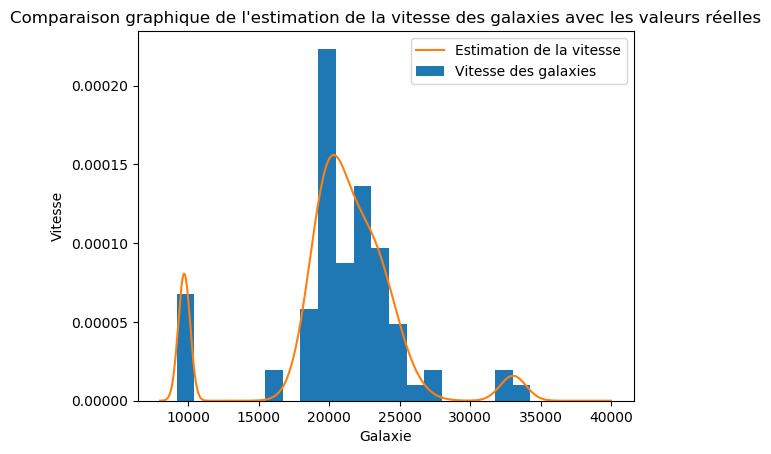

In [27]:
plt.hist(donnees, density=True, bins=20, label='Vitesse des galaxies')
plt.plot(x, estimation_f(x, nbComposante), label='Estimation de la vitesse')
plt.title('Comparaison graphique de l\'estimation de la vitesse des galaxies avec les valeurs réelles')
plt.xlabel('Galaxie')
plt.ylabel('Vitesse')
plt.legend()